In [1]:
# Code for PhD project on traffic management
# Iaroslav Kriuchkov
# Aalto University

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Function for downloading csv data from an automatic traffic monitoring system of Finnish Transport Agency
# url is the link to the exact file
# The function returns the Pandas DataFrame with the data from specific TMS point on specific year on specific day
def data_import (tms_id, region, year, day):
    column_names = ['id', 'year', 'day', 'hour', 'minute', 'second', '1/100 second', 'length', 'lane', 'direction', 'vehicle', 'speed', 'faulty', 'Total time', 'Time interval', 'Queue start' ]
    df = pd.DataFrame()
    url = 'https://aineistot.liikennevirasto.fi/lam/rawdata/YYYY/REGION_ID/lamraw_TMS_YY_DD.csv'
    url = url.replace('YYYY', str(year)).replace('REGION_ID', region).replace('TMS', tms_id).replace('YY', str(year)[2:4]).replace('DD', str(day))
    df = pd.read_csv(url, delimiter = ";", names = column_names)
    return df

In [3]:
# The DataFrame is created based on downloaded data
df = pd.DataFrame() 
df = data_import('117', '01', 2017, 100)
#print(df.head())

In [17]:
# aggregation_time_period shows the period, by which the data is aggregated (in minutes)  
aggregation_time_period = 2

In [18]:
# flow_list is the list, which calculates the flow with each of aggregation periods
# speed_list is the list, which calculates the total speed of the vehicles with each of aggregation periods
flow_list = [0 for i in range(int(24*60/aggregation_time_period))]
speed_list = [0 for i in range(int(24*60/aggregation_time_period))]

In [19]:
# Calcuation of flow and total speed
for i in range(len(df)):    
    flow_list[int(df["Total time"][i]/(aggregation_time_period*60*100))] += 1
    speed_list[int(df["Total time"][i]/(aggregation_time_period*60*100))] += df["speed"][i]

In [20]:
# Calcuation of arifmetic mean speed within the aggregation period
mean_speed_list = [i / j for i, j in zip(speed_list, flow_list)]
print(mean_speed_list)

ZeroDivisionError: division by zero

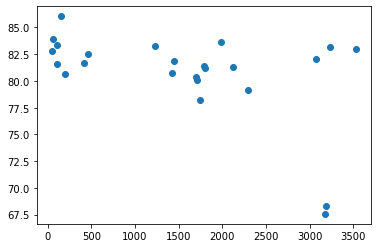

In [ ]:
# The scatter plot in speed-flow plane
plt.scatter(flow_list, mean_speed_list)
plt.show()